In [1]:
column_title = {
    'A': "A - Unique id untuk setiap perekaman data",
    'B': "B - Jumlah penggunaan energi dari perangkat elektronik dalam Wh",
    'C': "C - Jumlah penggunaan energi dari lampu dalam Wh",
    'D': "D - Temperatur di area dapur dalam Celcius",
    'E': "E - Persentase kelembapan di area dapur",
    'F': "F - Temperatur di ruang keluarga dalam Celcius",
    'G': "G - Persentase kelembapan di ruang keluarga",
    'H': "H - Temperatur di ruang cuci dalam Celcius",
    'I': "I - Persentase kelembapan di ruang cuci",
    'J': "J - Temperatur di ruang kantor dalam Celcius",
    'K': "K - Persentase kelembapan di ruang kantor",
    'L': "L - Temperatur di kamar mandi dalam Celcius",
    'M': "M - Persentase kelembapan di kamar mandi",
    'N': "N - Temperatur di luar rumah dalam Celcius",
    'O': "O - Persentase kelembapan di luar rumah",
    'P': "P - Temperatur di ruang setrika dalam Celcius",
    'Q': "Q - Persentase kelembapan di ruang setrika",
    'R': "R - Temperatur di kamar anak dalam Celcius",
    'S': "S - Persentase kelembapan di kamar anak",
    'T': "T - Temperatur di kamar utama dalam Celcius",
    'U': "U - Persentase kelembapan di kamar utama",
    'V': "V - Temperatur di area sekitar rumah dalam Celcius",
    'W': "W - Tekanan udara di area sekitar rumah dalam mm Hg",
    'X': "X - Persentase kelembapan di area sekitar rumah",
    'Y': "Y - Kecepatan angin di area sekitar rumah dalam m/s",
    'Z': "Z - Jarak pandang di area sekitar rumah dalam km",
    'AA': "AA - Suhu cair di area sekitar rumah dalam Â°C",
    'AB': "AB - Variabel random nondimensional 1",
    'AC': "AC - Variabel random nondimensional 2",
}

Import library and datase

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
cwd = os.getcwd()

DATA_DIR = "../data"

TRAIN_FILE = "{}/train.csv".format(DATA_DIR)
TEST_FILE = "{}/test.csv".format(DATA_DIR)
SUBMISSION_FILE = "{}/sample_submission.csv".format(DATA_DIR)

train = pd.read_csv(TRAIN_FILE)
test = pd.read_csv(TEST_FILE)

combine = [train, test]

Some feature engineering

In [104]:
for dataset in combine:
    dataset['tenth_minute_of_the_day'] = dataset['A'] % 144
    dataset['hour_of_day'] = dataset['A'] // 6 % 24
    dataset['day_of_week'] = dataset['A'] // 144 % 7
    dataset['tenth_minute_of_the_week'] = dataset['A'] % (144*7)
    
def energy_usage_mean_per_time_unit(time_unit):
    time_unit_dict = {}
    for _time_unit in train[time_unit].unique():
        time_unit_dict[_time_unit] = train['B'].loc[train[time_unit].isin([_time_unit])].mean()
        for dataset in combine:
            dataset[time_unit + "_energy_usage"] = dataset[time_unit].map(time_unit_dict)

energy_usage_mean_per_time_unit('tenth_minute_of_the_day')
energy_usage_mean_per_time_unit('hour_of_day')
energy_usage_mean_per_time_unit('day_of_week')
energy_usage_mean_per_time_unit('tenth_minute_of_the_week')
    
train.to_csv("{}/train_with_time_feature.csv".format(DATA_DIR))
test.to_csv("{}/test_with_time_feature.csv".format(DATA_DIR))

Penggunaan energi pada menit ke sepuluh pada satu hari dalam satu minggu
Contoh: penggunaan saat jam 00.00 pada hari SENIN

tenth_minute_of_the_day: 0 = 00:00, 143 = 23:50
day_of_week: 0 = senin, 6 = minggu

In [105]:
train.head()

,A,B,C,D,E,F,G,H,I,J,...,AB,AC,tenth_minute_of_the_day,hour_of_day,day_of_week,tenth_minute_of_the_week,day_of_week_energy_usage,tenth_minute_of_the_week_energy_usage,tenth_minute_of_the_day_energy_usage,hour_of_day_energy_usage
0,1,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,13.275433,13.275433,1,0,0,1,93.55335,105.714286,126.250000,139.547826
1,2,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.606195,18.606195,2,0,0,2,93.55335,109.285714,122.916667,139.547826
2,3,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,28.642668,28.642668,3,0,0,3,93.55335,130.000000,134.687500,139.547826
3,4,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.410389,45.410389,4,0,0,4,93.55335,201.428571,164.270833,139.547826
4,5,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,10.084097,10.084097,5,0,0,5,93.55335,194.285714,162.291667,139.547826


In [4]:
train[['tenth_minute_of_the_day','B', 'day_of_week', 'hour_of_day']].loc[train['A'].isin([1, 145, 289, 433, 577, 721, 865, 1009, 1153])]

,tenth_minute_of_the_day,B,day_of_week,hour_of_day
0,1,60,0,0
144,1,60,1,0
288,1,90,2,0
432,1,910,3,0
576,1,90,4,0
720,1,80,5,0
864,1,90,6,0
1008,1,40,0,0
1152,1,50,1,0


In [106]:
# plt.plot(train[['B']].loc[train['tenth_minute_of_the_day'].isin([143]) & train['day_of_week'].isin([0])].reset_index(drop=True))
# plt.show()
# plt.plot(train[['B']].loc[train['hour_of_day'].isin([5])& train['day_of_week'].isin([0])].reset_index(drop=True))
# plt.show()

Distribusi B

In [6]:
# discribe B
train['B'].describe()

count    13814.000000
mean        98.630375
std        106.209951
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max        910.000000
Name: B, dtype: float64

In [7]:
#skewness and kurtosis

print("Skewness: %f" % train['B'].skew())
print("Kurtosis: %f" % train['B'].kurt())

Skewness: 3.200843
Kurtosis: 11.869039


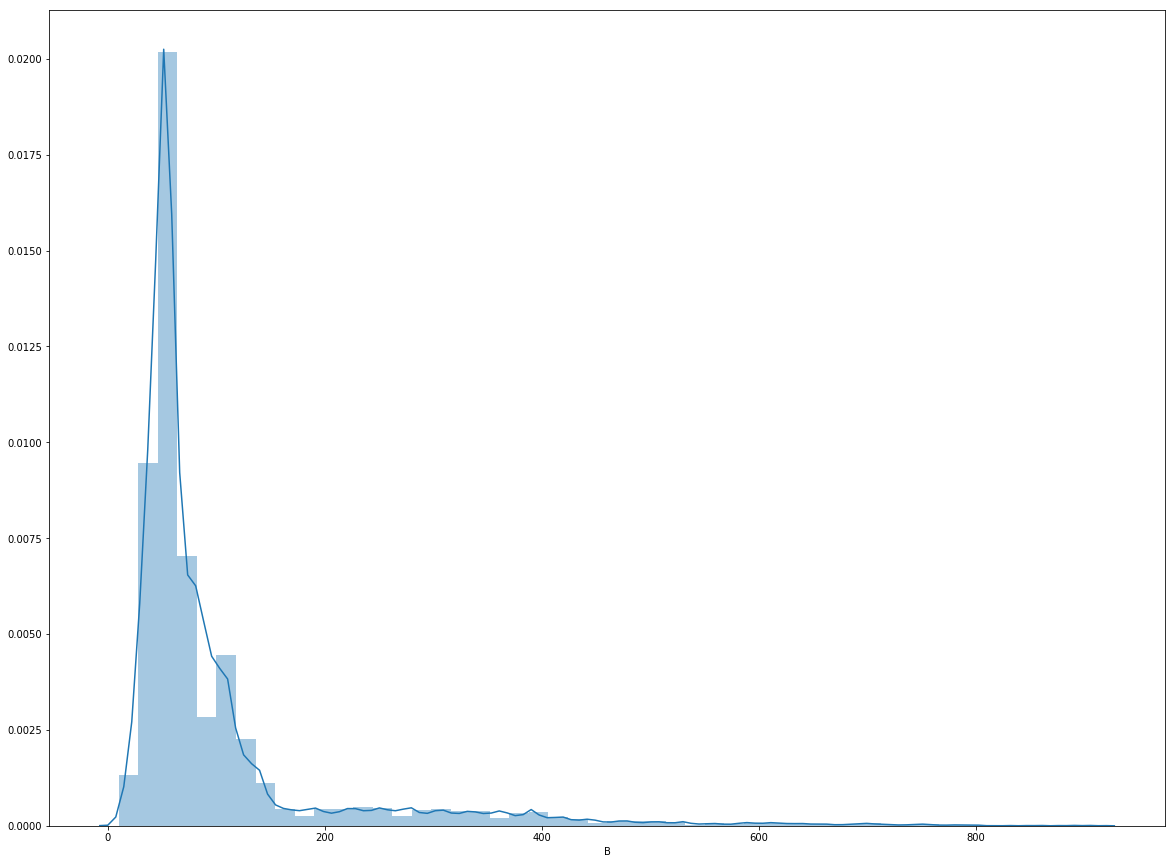

In [8]:
sns.distplot(train['B'])
fig=plt.gcf()
fig.set_size_inches(20,15)

In [107]:
def scatter_plot_B(var):
    var = var
    data = pd.concat([train['B'], train[var]], axis=1)
    data.plot.scatter(x=var, y='B', title=column_title[var])
    fig=plt.gcf()
    fig.set_size_inches(20,15)

headers = ['B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
# for column in headers:
#     scatter_plot_B(column)

In [108]:
headers = ['Q','R','S','T','U','V','W','X','Y','Z','AA','AB','AC']
# for column in headers:
#     scatter_plot_B(column)

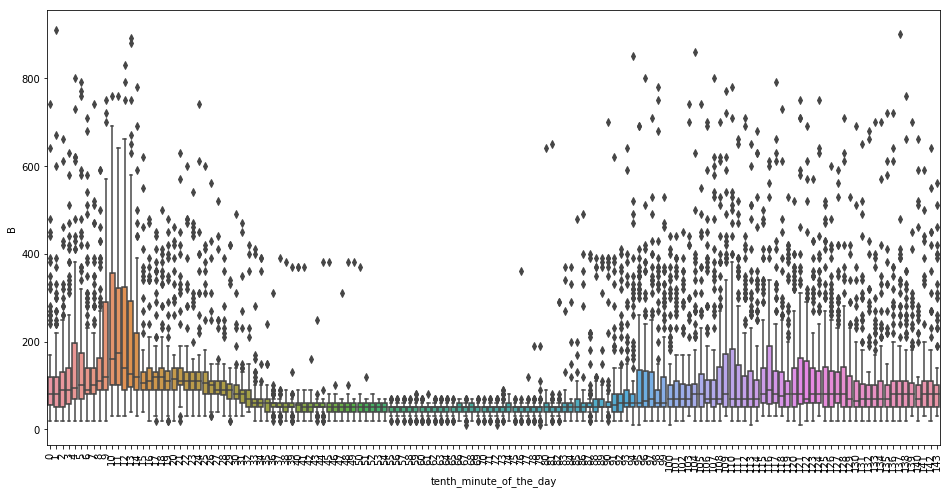

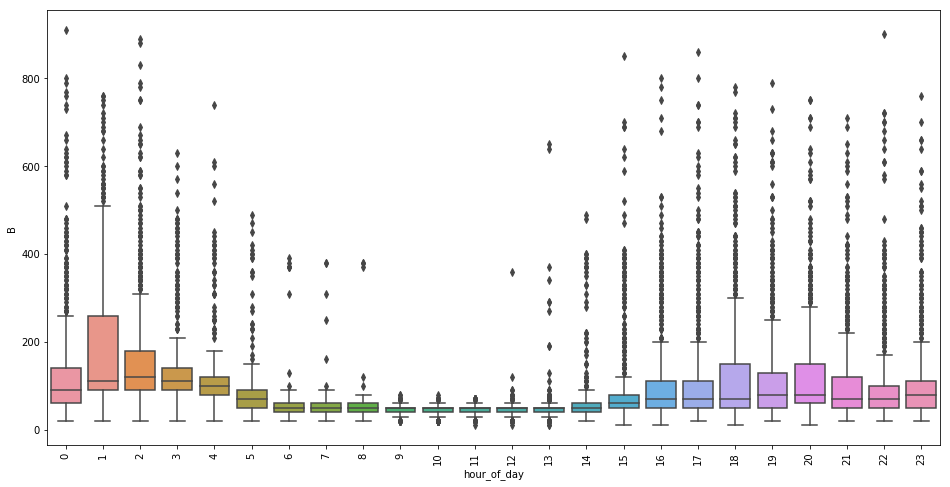

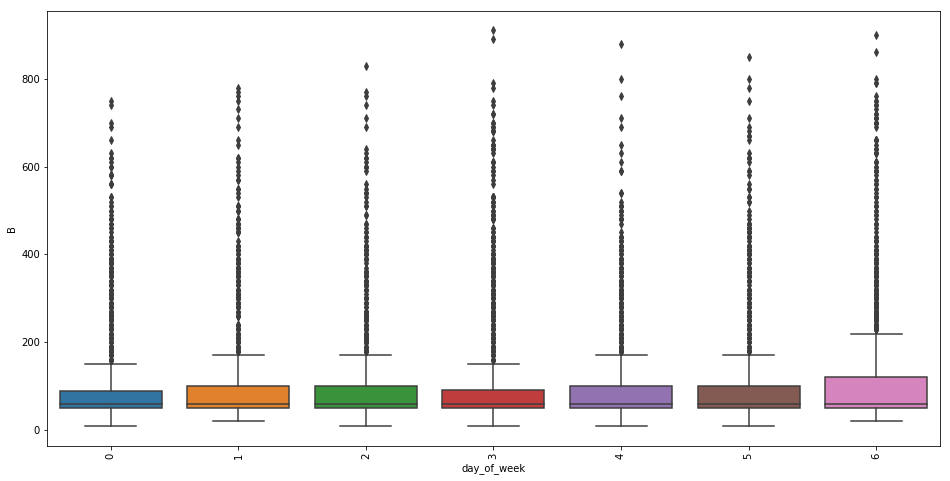

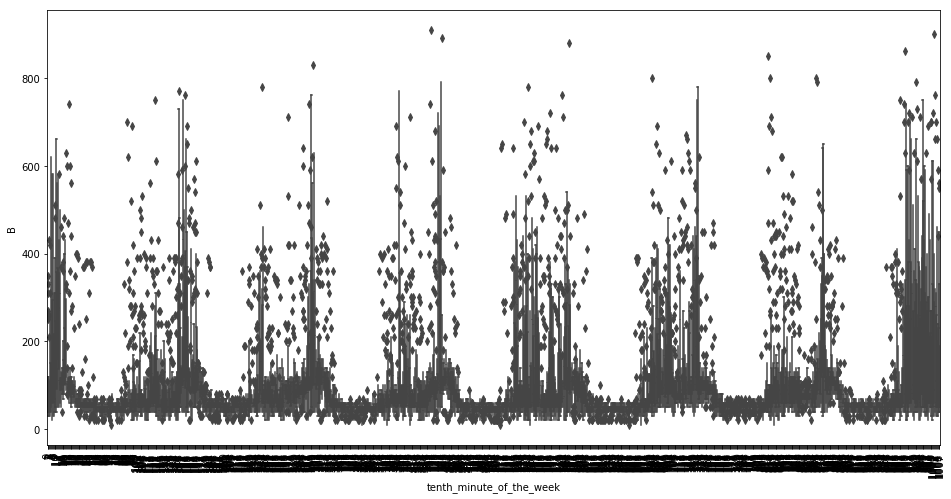

In [11]:
def box_plot_B(var):
#     var = var
    data = pd.concat([train['B'], train[var]], axis=1)
    f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=var, y="B", data=data)
    # fig.axis(ymin=0, ymax=800000);
    plt.xticks(rotation=90);

# var = 'tenth_minute_of_the_day'
# data = pd.concat([train['B'], train[var]], axis=1)
# f, ax = plt.subplots(figsize=(16, 8))
# fig = sns.boxplot(x=var, y="B", data=data)
# # fig.axis(ymin=0, ymax=800000);
# plt.xticks(rotation=90);

box_plot_B('tenth_minute_of_the_day')
box_plot_B('hour_of_day')
box_plot_B('day_of_week')
box_plot_B('tenth_minute_of_the_week')

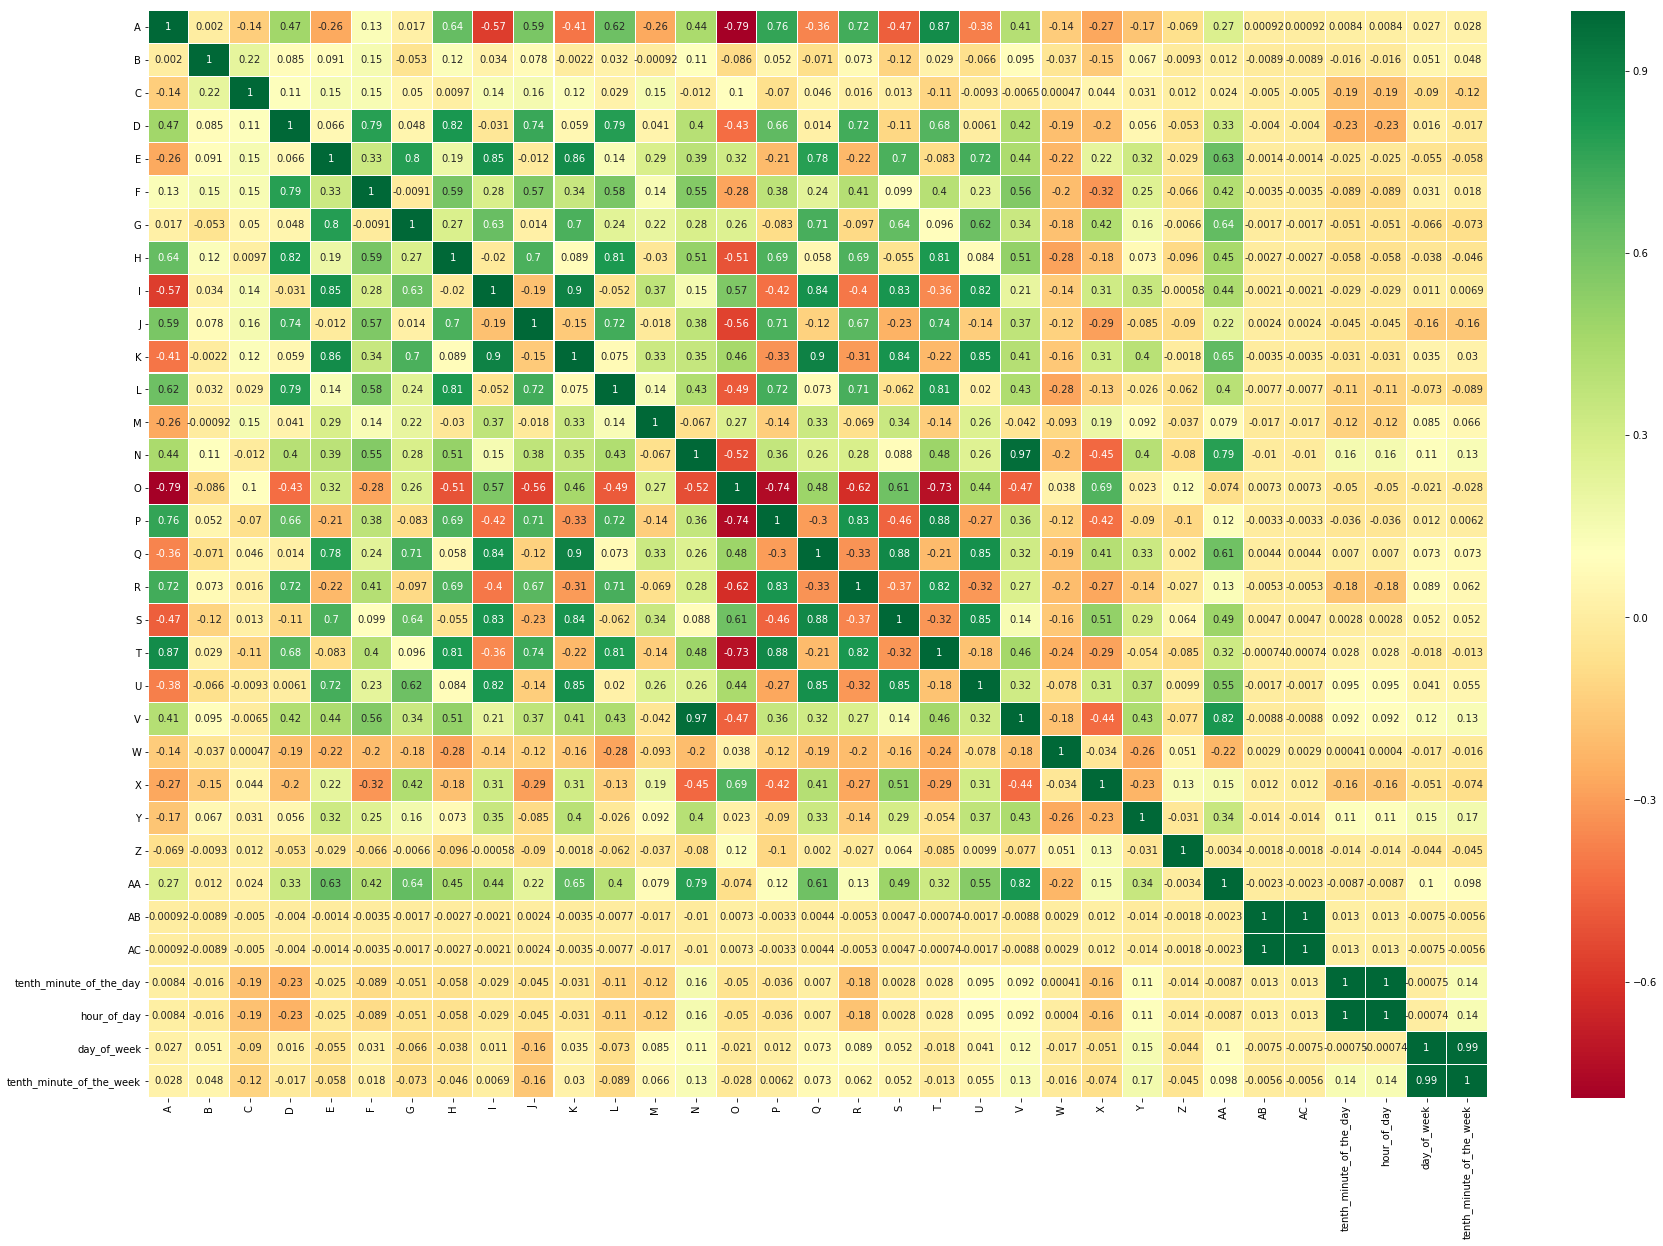

In [12]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.1,xticklabels=True,yticklabels=True) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(30,20)
# plt.savefig("test2.svg")

In [13]:
train.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB',
       'AC', 'tenth_minute_of_the_day', 'hour_of_day', 'day_of_week',
       'tenth_minute_of_the_week'],
      dtype='object')